<a href="https://colab.research.google.com/github/solishiguera/reporte-performance/blob/main/ReportePerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from google.colab import drive
drive.mount("/content/gdrive")  
!pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/SEMESTRE_7/Modulo2/Evidencia2


In [71]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/SEMESTRE_7/Modulo2/Evidencia2"
!ls

/content/gdrive/MyDrive/Colab Notebooks/SEMESTRE_7/Modulo2/Evidencia2
cereal.csv	  fun.ipynb		ReportePerformance.ipynb
Evidencia2.ipynb  ReporteDesempeño.pdf	wine.data


In [72]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
import numpy as np
import pandas as pd
import mlxtend
from mlxtend.evaluate import bias_variance_decomp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from pandas.plotting import scatter_matrix
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import *
import warnings
warnings.filterwarnings("ignore")

*   1) Alcohol
*   2) Malic acid
*   3) Ash
*   4) Alcalinity of ash  
*   5) Magnesium
*   6) Total phenols
*   7) Flavanoids
*   8) Nonflavanoid phenols
*   9) Proanthocyanins
*   10) Color intensity
*   11) Hue
*   12) OD280/OD315 of diluted wines
*   13) Proline   

# Modelo 1

In [74]:
columns = ['Alcohol', 
           'Malic acid', 
           'Ash', 
           'Alcalinity of ash', 
           'Magnesium', 
           'Total phenols', 
           'Flavanoids', 
           'Nonflavanoid phenols', 
           'Proanthocyanins', 
           'Color intensity', 
           'Hue', 
           'OD280/OD315 of diluted wines', 
           'Proline']
df = pd.read_csv('wine.data', names=columns)
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [75]:
df.shape

(178, 13)

In [76]:
df.isna().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [77]:
df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


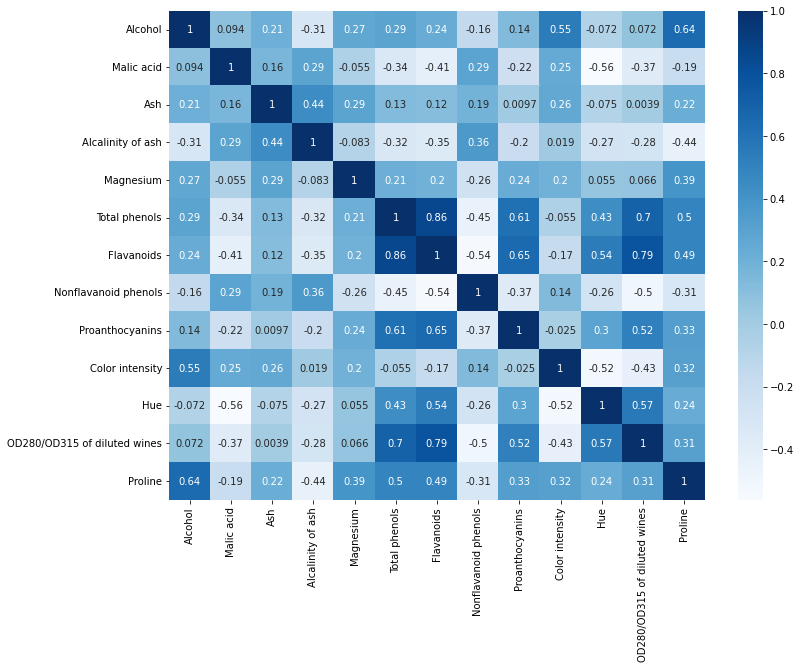

In [78]:
corr_df = df.corr(method='pearson')
plt.figure(figsize=(12, 9))
sns.heatmap(corr_df, annot=True, cmap="Blues")
plt.show()

## Modelo
Se utilizará un modelo de regresión lineal. Con base a la matriz de correlación, se determinó que para el primer modelo utilizaremos una variable independiente (X) 'Total phenols'.

#### Información sobre split

Tenemos un total de 178 datos
* X_train = 133
* X_test = 45
* Y_train = 133
* Y_test = 45



In [79]:
x = df[['Total phenols']].copy()
# Nuestra varible dependiente
y = df[['Flavanoids']].copy()

# Separamos un conjunto de datos para entrenar y otro para probar
X_train, X_test, y_train, y_test = train_test_split(x, y)


In [80]:
# Iniciamos el modelo
ml_mod = LinearRegression(fit_intercept=False)

In [81]:
# Training model
ml_mod.fit(X_train,y_train)

# Training predictions
y_train_pred_ml = ml_mod.predict(X_train)

# Model evaluation
r1_ml = metrics.r2_score(y_train, y_train_pred_ml)
print("Score de datos de entrenamiento: " +"{:.6}".format(r1_ml*100)+"%")

# Testing predictions
y_test_pred_ml = ml_mod.predict(X_test)

# Model evaluation
r2_ml = metrics.r2_score(y_test, y_test_pred_ml)
print("Score de datos de prueba: " +"{:.6}".format(r2_ml*100)+"%")

mse_ml = mean_squared_error(y_test,y_test_pred_ml)
print("Error cuadrático medio: " +"{:.6}".format(np.sqrt(mse_ml)))

Score de datos de entrenamiento: 63.5222%
Score de datos de prueba: 71.0565%
Error cuadrático medio: 0.561405


In [82]:
print('Y Intercept de modelo: {}'.format(ml_mod.intercept_))

Y Intercept de modelo: 0.0


In [83]:
print('Parámteros de nuestro modelo: {}'.format(ml_mod.get_params()))

Parámteros de nuestro modelo: {'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


Score de datos de entrenamiento: 66.6118%
Score de datos de prueba: 62.3256%
Error cuadrático medio: 0.546901 

Score de datos de entrenamiento: 67.1738%
Score de datos de prueba: 60.2755%
Error cuadrático medio: 0.657707 

Score de datos de entrenamiento: 63.7388%
Score de datos de prueba: 71.7019%
Error cuadrático medio: 0.531193 

Score de datos de entrenamiento: 65.6706%
Score de datos de prueba: 65.958%
Error cuadrático medio: 0.609776 

Score de datos de entrenamiento: 65.6297%
Score de datos de prueba: 63.4091%
Error cuadrático medio: 0.607042 



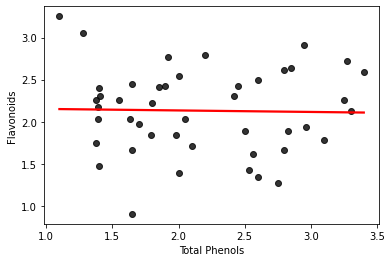

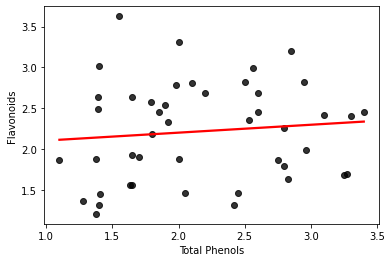

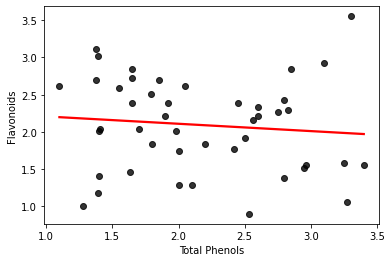

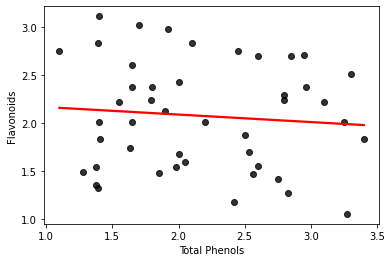

In [84]:
predictions = []
for i in range(5) :
  # Training model
  X_train, X_test, y_train, y_test = train_test_split(x, y)
  ml_mod.fit(X_train,y_train)

  # Training predictions
  y_train_pred_ml = ml_mod.predict(X_train)

  # Model evaluation
  r1_ml = metrics.r2_score(y_train, y_train_pred_ml)
  print("Score de datos de entrenamiento: " +"{:.6}".format(r1_ml*100)+"%")

  # Testing predictions
  y_test_pred_ml = ml_mod.predict(X_test)
  predictions.append(y_test_pred_ml)

  # Model evaluation
  r2_ml = metrics.r2_score(y_test, y_test_pred_ml)
  print("Score de datos de prueba: " +"{:.6}".format(r2_ml*100)+"%")

  mse_ml = mean_squared_error(y_test,y_test_pred_ml)
  print("Error cuadrático medio: " +"{:.6} \n".format(np.sqrt(mse_ml)))

for i in range(4) : 
  ax = sns.regplot(X_test, predictions[i], scatter_kws={"color": "black"}, line_kws={"color": "red"}, ci=None)
  ax.set(xlabel='Total Phenols', ylabel='Flavonoids')
  plt.show()


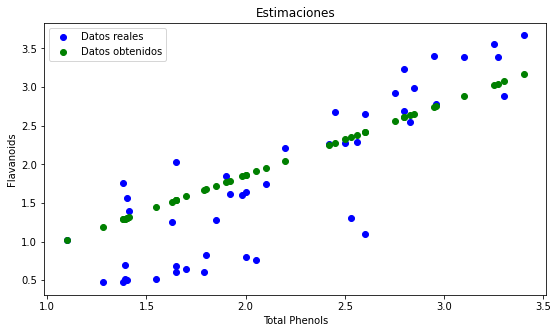

In [85]:
plt.figure(figsize=(9,5))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, predictions[4], color='green',label='Datos obtenidos')
plt.title('Estimaciones')
plt.xlabel('Total Phenols')
plt.ylabel('Flavanoids')

plt.legend()
plt.show()

In [86]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

# X_train = X_train['Total phenols'].values.reshape(1, -1)
# y_train = y_train['Flavanoids'].values.reshape(1, -1)
# X_test = X_test['Total phenols'].values.reshape(1, -1)
# y_test = y_test['Flavanoids'].values.reshape(1, -1)


In [87]:

print('   Flavanoids')
print('{:<5} {:<3} {}'.format('Real', 'vs', 'Estimado'))
for i in range(10) :
  print('{:<10} {:.2f}'.format(df['Flavanoids'].values.tolist()[i], predictions[4].tolist()[i][0]))

   Flavanoids
Real  vs  Estimado
3.06       1.91
2.76       1.58
3.24       1.29
3.49       2.25
2.69       1.52
3.39       2.05
2.52       1.86
2.51       3.17
2.98       1.54
3.15       1.54


Tenemos un total de 178 datos
* X_train = 133
* X_test = 45
* Y_train = 133
* Y_test = 45


# Modelo 2

In [88]:
columns = ['Alcohol', 
           'Malic acid', 
           'Ash', 
           'Alcalinity of ash', 
           'Magnesium', 
           'Total phenols', 
           'Flavanoids', 
           'Nonflavanoid phenols', 
           'Proanthocyanins', 
           'Color intensity', 
           'Hue', 
           'OD280/OD315 of diluted wines', 
           'Proline']
df2 = pd.read_csv('wine.data', names=columns)
df2.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


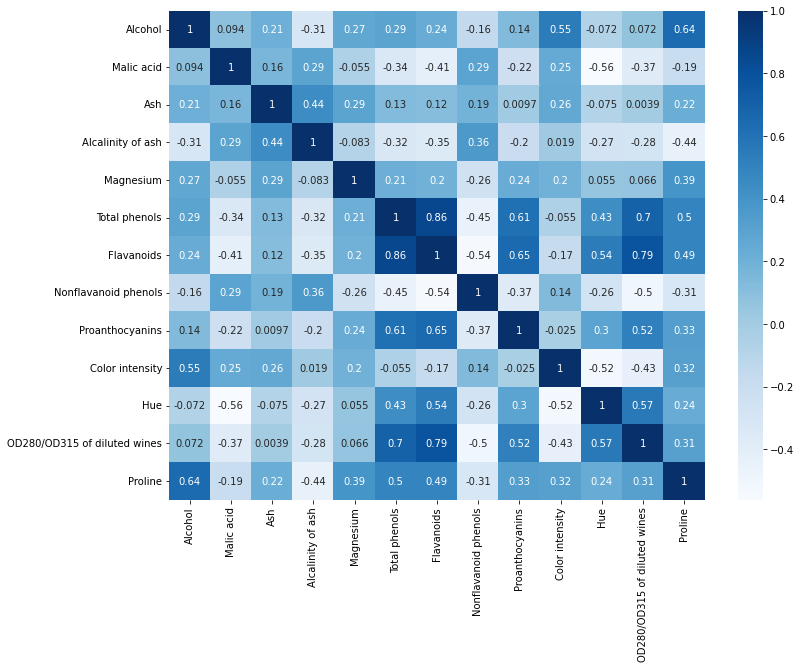

In [89]:
corr_df = df.corr(method='pearson')
plt.figure(figsize=(12, 9))
sns.heatmap(corr_df, annot=True, cmap="Blues")
plt.show()

In [90]:

x_2 = df[['Malic acid','Total phenols','Nonflavanoid phenols','Proanthocyanins','Hue','OD280/OD315 of diluted wines','Proline']].copy()
y_2 = df[['Flavanoids']].copy()

           

# Separamos un conjunto de datos para entrenar y otro para probar
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2)


In [91]:
# Iniciamos el modelo
ml_mod_2 = LinearRegression()

In [92]:
# Training model
ml_mod_2.fit(X_train_2,y_train_2)


 
# Testing predictions
y_test_2_pred_ml = ml_mod_2.predict(X_test_2)

# Training predictions
y_train_2_pred_ml = ml_mod_2.predict(X_train_2)

# Model evaluation
r1_ml_2 = metrics.r2_score(y_train_2, y_train_2_pred_ml)
print("Score de datos de entrenamiento: " +"{:.6}".format(r1_ml_2*100)+"%")

# Model evaluation
r2_ml_2 = metrics.r2_score(y_test_2, y_test_2_pred_ml)
print("Score de datos de prueba: " +"{:.6}".format(r2_ml_2*100)+"%")

mse_ml_2 = mean_squared_error(y_test_2,y_test_2_pred_ml)
print("Error cuadrático medio: " +"{:.6}".format(np.sqrt(mse_ml_2)))

Score de datos de entrenamiento: 84.3543%
Score de datos de prueba: 84.5922%
Error cuadrático medio: 0.390349


In [93]:
print('Parámteros de nuestro modelo: \n {}'.format(ml_mod.get_params()))

Parámteros de nuestro modelo: 
 {'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [94]:
print('Y Intercept de modelo: {}'.format(ml_mod_2.intercept_))

Y Intercept de modelo: [-0.97498739]


In [95]:
print('coeficientes de modelo: \n{}'.format(ml_mod_2.coef_))

coeficientes de modelo: 
[[-4.02628025e-02  7.73032909e-01 -1.12360527e+00  2.70360766e-01
   3.83464341e-01  3.11146964e-01  1.81779348e-04]]


Score de datos de entrenamiento: 83.1489%
Score de datos de prueba: 88.9049%
Error cuadrático medio: 0.330489 

Score de datos de entrenamiento: 84.7183%
Score de datos de prueba: 83.0627%
Error cuadrático medio: 0.399979 

Score de datos de entrenamiento: 82.7251%
Score de datos de prueba: 90.626%
Error cuadrático medio: 0.28976 

Score de datos de entrenamiento: 87.0888%
Score de datos de prueba: 76.2068%
Error cuadrático medio: 0.494872 

Score de datos de entrenamiento: 84.0323%
Score de datos de prueba: 85.5939%
Error cuadrático medio: 0.388558 



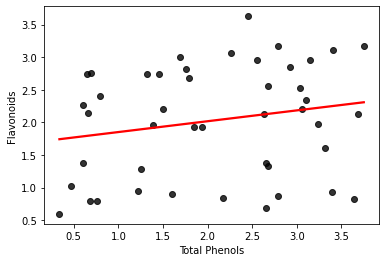

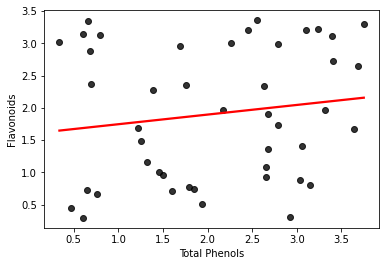

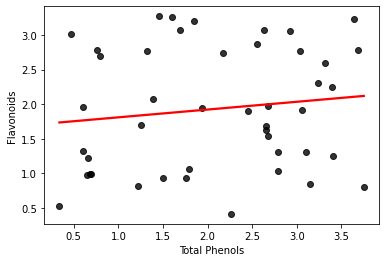

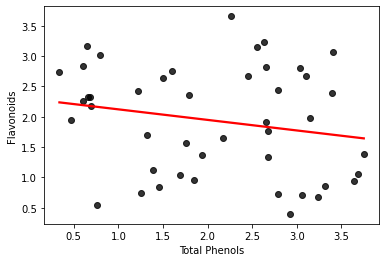

In [96]:

predictions = []
for i in range(5) :
  ml_mod_3 = LinearRegression()
  # Training model
  X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(x_2, y_2)
  ml_mod_3.fit(X_train_3,y_train_3)

  # Training predictions
  y_train_3_pred_ml = ml_mod_3.predict(X_train_3)

  # Model evaluation
  r1_ml_3 = metrics.r2_score(y_train_3, y_train_3_pred_ml)
  print("Score de datos de entrenamiento: " +"{:.6}".format(r1_ml_3*100)+"%")

  # Testing predictions
  y_test_3_pred_ml = ml_mod_3.predict(X_test_3)
  predictions.append(y_test_3_pred_ml)

  # Model evaluation
  r2_ml = metrics.r2_score(y_test_3, y_test_3_pred_ml)
  print("Score de datos de prueba: " +"{:.6}".format(r2_ml*100)+"%")

  mse_ml_3 = mean_squared_error(y_test_3,y_test_3_pred_ml)
  print("Error cuadrático medio: " +"{:.6} \n".format(np.sqrt(mse_ml_3)))

cols = ['r', 'g', 'b']

#for i in range(len(predictions)): 
#   predictions[i] = predictions.flatten()

l =  predictions[0].flatten().tolist()

# print(X_test_3.shape)
# for i in l:
#   listita.append(i)

# ax = sns.regplot(np.linspace(1,45,45), l, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ci=None)

for i in range(4) : 
  ax = sns.regplot(y_test_3, predictions[i].flatten().tolist(), scatter_kws={"color": "black"}, line_kws={"color": "red"}, ci=None)
  ax.set(xlabel='Total Phenols', ylabel='Flavonoids')
  plt.show()


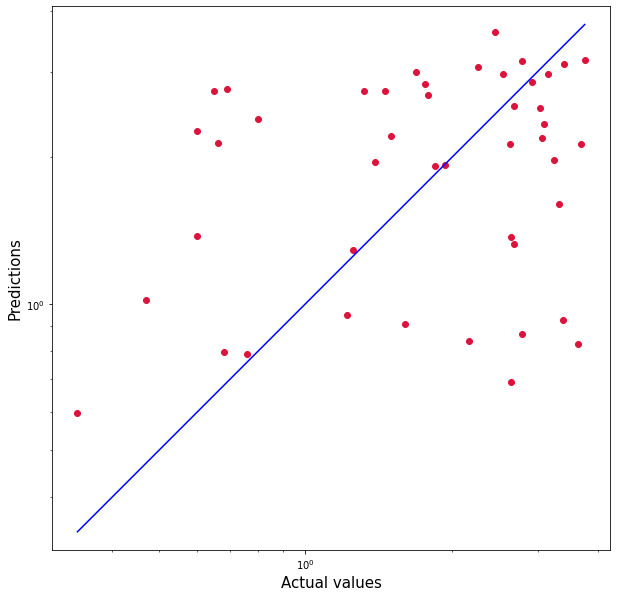

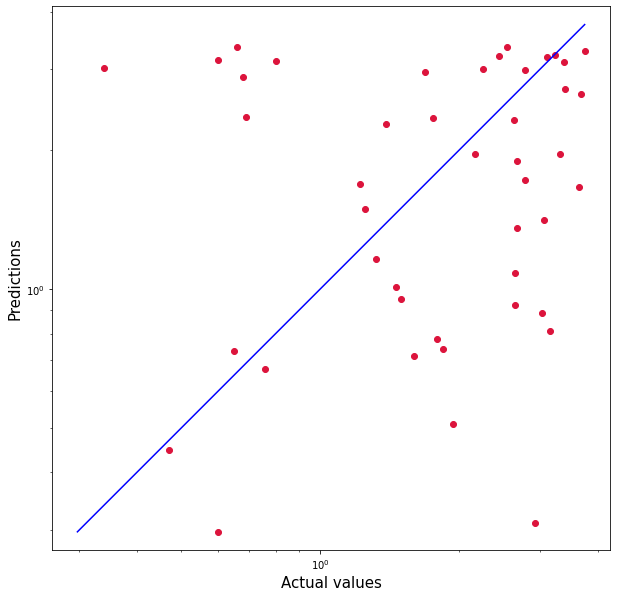

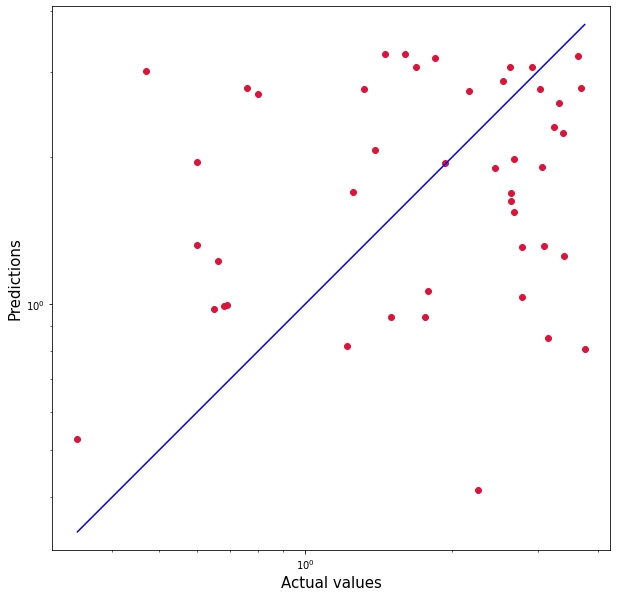

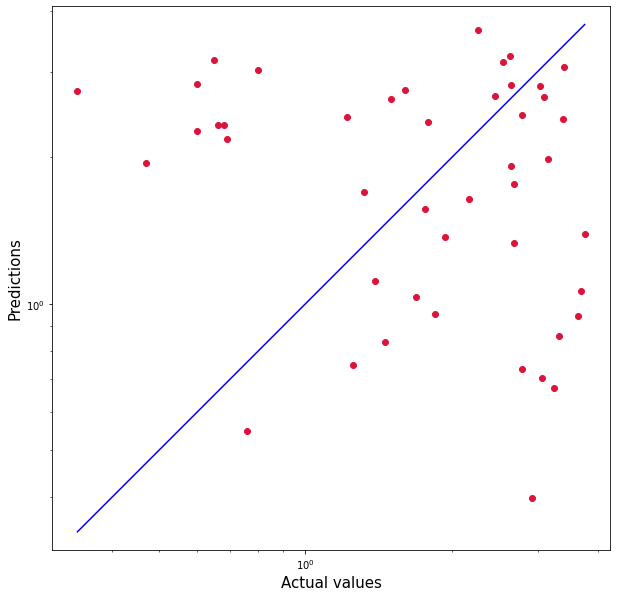

In [100]:
actual = y_test_3.copy().values.flatten().tolist()
for i in range(4) :
  predicted = predictions[i].flatten().tolist()
  plt.figure(figsize=(10,10))
  plt.scatter(actual, predicted, c='crimson')
  plt.yscale('log')
  plt.xscale('log')

  p1 = max(max(predicted), max(actual))
  p2 = min(min(predicted), min(actual))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.xlabel('Actual values', fontsize=15)
  plt.ylabel('Predictions', fontsize=15)
  plt.axis('equal')
  plt.show()

In [130]:
print(X_train.shape)
print(X_test.shape)

print('   Flavanoids')
print('{:<5} {:<3} {}'.format('Real', 'vs', 'Estimado'))
for i in range(10) :
  print('{:<10.2f} {:.2f}'.format(predictions[4].flatten().tolist()[i], y_test_3.values.flatten().tolist()[i]))

(133, 1)
(45, 1)
   Flavanoids
Real  vs  Estimado
1.75       1.79
3.12       3.39
2.70       2.79
2.64       2.55
2.92       2.79
0.78       0.65
0.51       1.22
1.88       1.85
0.95       0.60
0.78       0.69
